In [1]:
from clustering_utils import *

c:\Users\Admin\Desktop\inf2008_machine_learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
enroll_folder_path = "demo/embeddings/speaker_embeddings/voiceprint"
test_folder_path = "../../../test_set/data/voiceprint_ecapa_tdnn/speaker_embeddings"

# Load enroll data from test folder
X_enroll1, enroll_speaker_ids1 = load_enroll_data(test_folder_path)

# Load enroll data from enroll folder
X_enroll2, enroll_speaker_ids2 = load_enroll_data(enroll_folder_path)

# Append the enroll embeddings and speaker IDs together
X_enroll_combined = np.concatenate((X_enroll1, X_enroll2), axis=0)
enroll_speaker_ids_combined = enroll_speaker_ids1 + enroll_speaker_ids2

# Reduce embeddings using UMAP and time the operation
%time umap_model, X_umap_2d = reduce_embeddings_umap(X_enroll_combined, n_components=2, random_state=42)

Found 438 enroll files.
Enroll embeddings shape: (438, 192)
Found 80 enroll files.
Enroll embeddings shape: (80, 192)


c:\Users\Admin\Desktop\inf2008_machine_learning\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\Desktop\inf2008_machine_learning\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


CPU times: total: 469 ms
Wall time: 628 ms


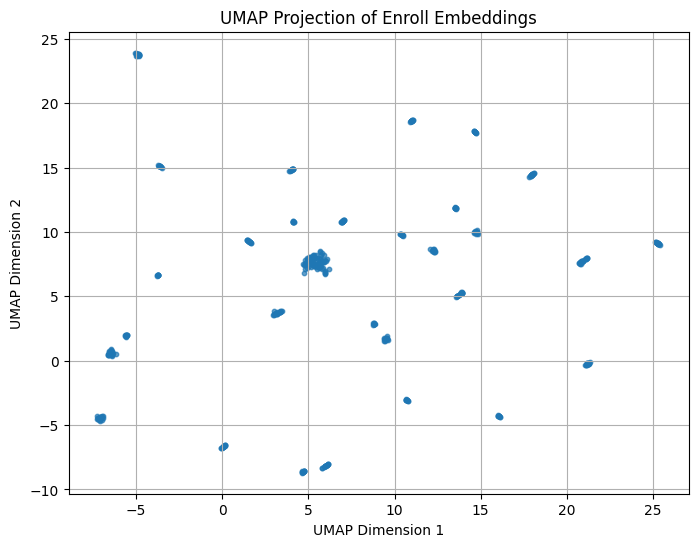

In [16]:
import matplotlib.pyplot as plt

# Assuming X_umap_2d is of shape (n_samples, 2)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], s=10, alpha=0.7)
plt.title("UMAP Projection of Enroll Embeddings")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()


In [17]:
hdbscan_labels = cluster_enroll_hdbscan(X_umap_2d, min_cluster_size=5, min_samples=5)


HDBSCAN labels: [13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 18 18 18 18 18 18
 18 18 18 18 18 23 23 23 23 23 23 23 23 23 23 23  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7 27 27 27 27 27 27 27 27 27 27 27 27 27 27  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 14 14 14 14 -1 14 14 15 15
 15 15 14 15 15 15 15 15 15 -1 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20  9  9  9  9  9  9  9  9  9  9 16 16 16 16 16 16 16 16 16 16
 16 21 21 21 21 21 21 21 21 21 21 21 21  1  1  1  1  1  1  1  1  1  1  1
  1  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 19 19 19 19 19
 19 19 19 19 19 19 19 19 19 19  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5 11 11 11 11 11 11 11 11 11 11 11 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 25 25 25 25 25 25 25 25 25 25
 25 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 22 22 22 22 22 22 22 22 22 22 2

c:\Users\Admin\Desktop\inf2008_machine_learning\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\Desktop\inf2008_machine_learning\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [19]:
from collections import defaultdict

cluster_to_speakers = defaultdict(list)
for idx, label in enumerate(hdbscan_labels):
    # Skip noise points if label == -1
    if label != -1:
        speaker_id = enroll_speaker_ids_combined[idx]
        cluster_to_speakers[label].append(speaker_id)

# Print out the cluster IDs and the corresponding speaker IDs
for cluster_label, speakers in cluster_to_speakers.items():
    print(f"Cluster {cluster_label}:")
    print(speakers)
    print()

Cluster 13:
['1089', '1089', '1089', '1089', '1089', '1089', '1089', '1089', '1089', '1089', '1089', '1089', '1089', '1089', '1089', '1089', '1089', '1089']

Cluster 18:
['121', '121', '121', '121', '121', '121', '121', '121', '121', '121', '121']

Cluster 23:
['1221', '1221', '1221', '1221', '1221', '1221', '1221', '1221', '1221', '1221', '1221']

Cluster 7:
['1284', '1284', '1284', '1284', '1284', '1284', '1284', '1284', '1284', '1284', '1284', '1284', '1284', '1284', '1284', '1284']

Cluster 27:
['1320', '1320', '1320', '1320', '1320', '1320', '1320', '1320', '1320', '1320', '1320', '1320', '1320', '1320']

Cluster 2:
['1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580', '1580']

Cluster 24:
['1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995']

Cluster 14:
['237', '237', 

Observation: good, it clusters all her voice tgt.

In [7]:
enroll_folder_path = "demo/embeddings/speaker_embeddings/voiceprint"
test_folder_path = "../../../test_set/data/voiceprint_ecapa_tdnn/speaker_embeddings"

%time umap_model_demo, speaker_cluster_mapping_demo, cluster_centroids_demo = process_enroll_data(enroll_folder_path, enroll_folder_path) # test_folder_path

Found 80 enroll files.
Enroll embeddings shape: (80, 192)
Found 80 enroll files.
Enroll embeddings shape: (80, 192)


c:\Users\Admin\Desktop\inf2008_machine_learning\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\Desktop\inf2008_machine_learning\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


HDBSCAN labels: [ 8  8  9  0  7  7 13 12  1  2  3  2  6  2  2  2 13  9  5 -1  4  4  4  0
  7  4 13 12  1  2  3 11  3  3 -1  4 -1 10 10 -1  8  9 -1  0  7  7 13 12
  1 12  3 11  5  3 -1 -1 12 -1 10  6  8  7  8  0  7  7 -1  2  1  2  3 11
  5  3 11  2 11  7  7  6  8  8  9  0  7  7 13 12  1  2  3  2  6  2  2  2
 13  9  5 -1  4  4  4  0  7  4 13 12  1  2  3 11  3  3 -1  4 -1 10  9 -1
  8  9 -1  0  7  7 13 12  1 12  3 11  5  3 -1 13 12 10 10  6  8  7  8  0
  7  7 -1  2  1  2  3 11  5  3 11  2 11  7  7  6]
Number of HDBSCAN clusters (excluding noise): 14
Speaker to Cluster Mapping (from enroll):
Speaker dd: Cluster 2
Speaker huang: Cluster 4
Speaker meme: Cluster 12
Speaker purple: Cluster 7
CPU times: total: 14.1 s
Wall time: 14.1 s


c:\Users\Admin\Desktop\inf2008_machine_learning\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\Desktop\inf2008_machine_learning\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [23]:
import pickle

# Save the UMAP model, speaker cluster mapping, and cluster centroids to a file
with open("umap_model_demo.pkl", "wb") as f:
    pickle.dump({
        "umap_model": umap_model_demo,
        "speaker_cluster_mapping": speaker_cluster_mapping_demo,
        "cluster_centroids": cluster_centroids_demo
    }, f)


In [2]:
import pickle

with open("umap_model_demo.pkl", "rb") as f:
    data = pickle.load(f)

umap_model_demo = data["umap_model"]
speaker_cluster_mapping_demo = data["speaker_cluster_mapping"]
cluster_centroids_demo = data["cluster_centroids"]


In [12]:
trial_file = "demo/embeddings/speaker_embeddings/voiceprint/dd-011.npy"
speaker_id = 'dd'

trial_embedding = np.squeeze(np.load(trial_file))
# Compute cluster match (0 or 1)
%time cluster_match = get_cluster_match(speaker_id, trial_embedding, umap_model_demo, speaker_cluster_mapping_demo, cluster_centroids_demo)
print(cluster_match)

CPU times: total: 0 ns
Wall time: 6 ms
1


c:\Users\Admin\Desktop\inf2008_machine_learning\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [6]:
print(assign_cluster_to_trial(trial_embedding, umap_model_demo, cluster_centroids_demo))

17


c:\Users\Admin\Desktop\inf2008_machine_learning\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
